In [3]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.

style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
 

In [4]:
train=pd.read_csv('https://raw.githubusercontent.com/powell-menezes/Bike-Sharing-Demand/master/train.csv')
test=pd.read_csv('https://raw.githubusercontent.com/powell-menezes/Bike-Sharing-Demand/master/test.csv')          
df=train.copy()
test_df=test.copy()
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.columns.unique()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [7]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

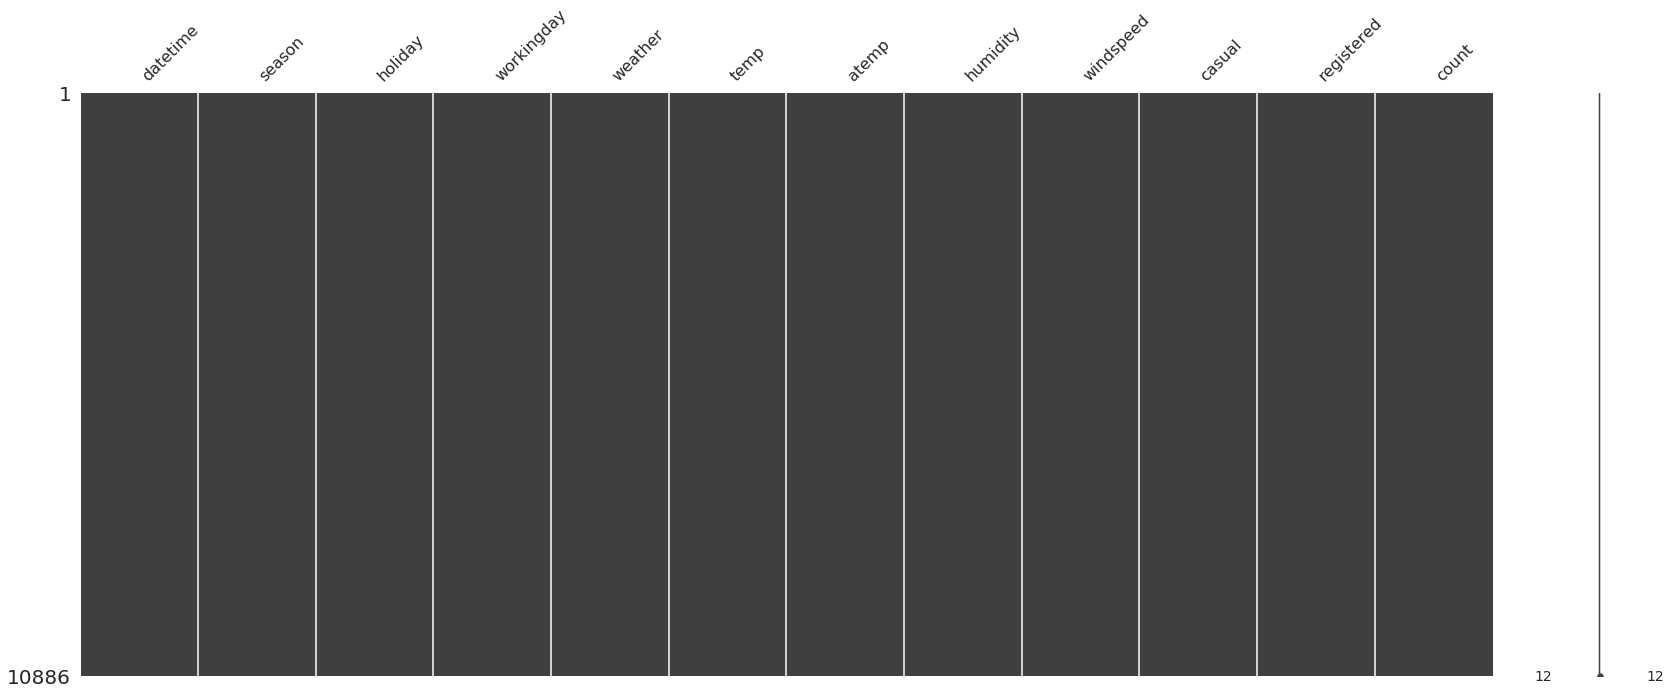

In [9]:
msno.matrix(df) #better way to visualize null values

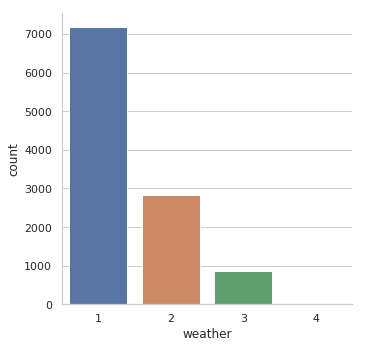

In [10]:
sns.factorplot(x='weather',data=df,kind='count',size=5,aspect=1)  
# 1-> spring
# 2-> summer
# 3-> fall
# 4-> winter
plt.show()

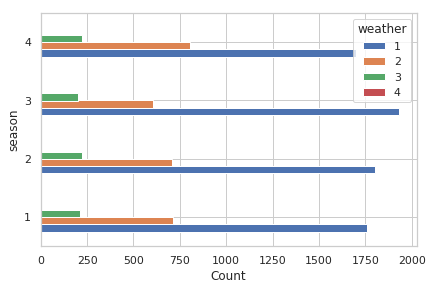

In [11]:
df_temp = df.groupby(['season','weather']).size().to_frame(name='Count').reset_index()
df_temp2 = df_temp.pivot(index='season', columns='weather', values='Count')
ax=df_temp2.plot(kind='barh')
ax.set_xlabel("Count")
plt.show()



Weather

1: Clear, Few clouds, Partly\n   cloudy, Partly cloudy'

2: Mist + Cloudy, Mist + Broken clouds,\n Mist + Few clouds, Mist'

3: Light Snow, Light Rain + Thunderstorm +,\n Light Rain + Scattered clouds'

4: Heavy Rain + Ice Pallets + \nThunderstorm + Mist + Fog'

season

 1 = spring, 2 = summer, 3 = fall, 4 = winter


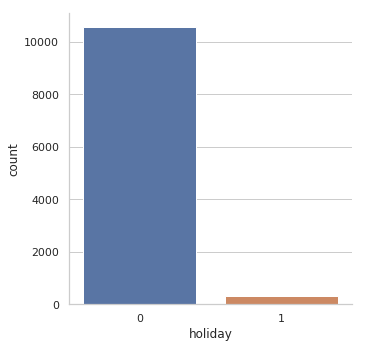

In [12]:


sns.factorplot(x='holiday',data=df,kind='count',size=5,aspect=1) # majority of data is for non holiday days.

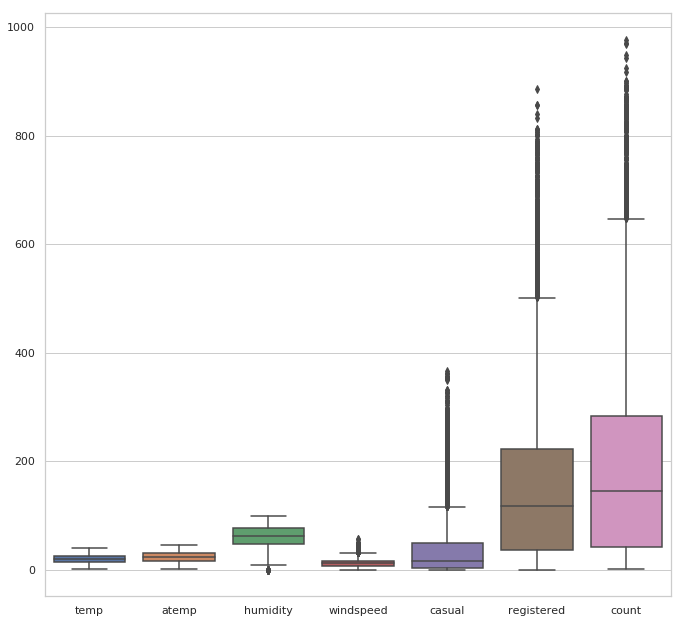

In [13]:
sns.boxplot(data=df[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
fig=plt.gcf()
fig.set_size_inches(10,10)

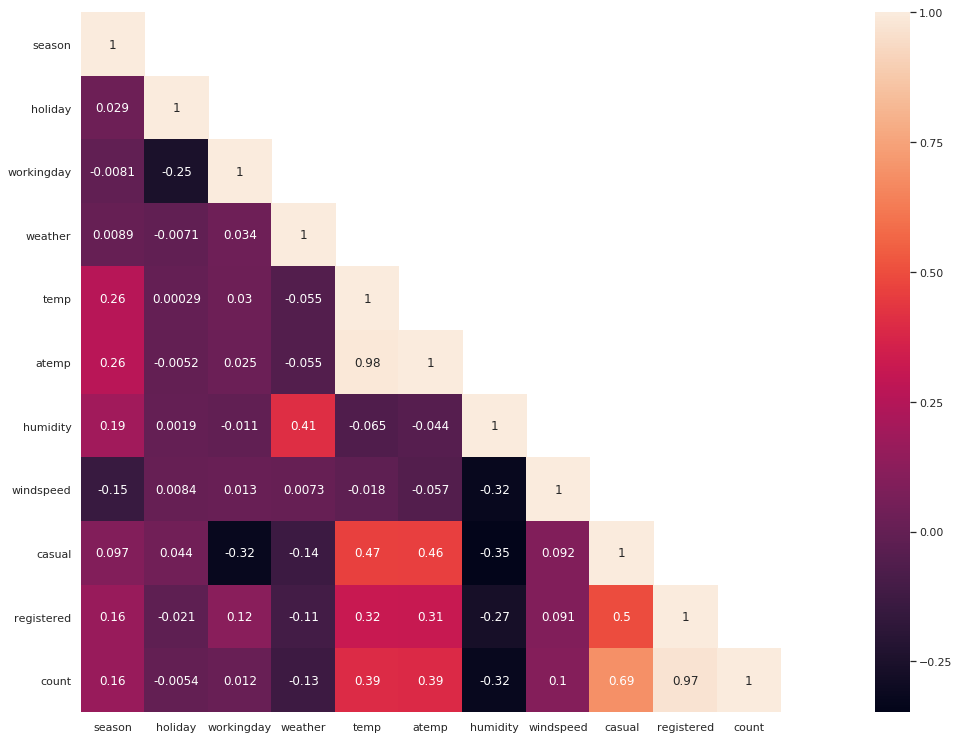

In [14]:
#corelation matrix.
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)


humidity is inversely related to count as expected as the weather is humid people will not like to travel on a bike.


Also note that weather and count are inversly related. ie as weather icreases(1 to 4) it implies that weather is getting more worse and so lesser people will rent bikes.

registered/casual and count are highly related which indicates that most of the bikes that are rented are registered.



In [0]:
df.drop(['registered'],axis=1,inplace=True)

In [16]:
season=pd.get_dummies(df['season'],prefix='season')
df=pd.concat([df,season],axis=1)
df.head()
season=pd.get_dummies(test_df['season'],prefix='season')
test_df=pd.concat([test_df,season],axis=1)
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0


In [17]:
weather=pd.get_dummies(df['weather'],prefix='weather')
df=pd.concat([df,weather],axis=1)
df.head()
weather=pd.get_dummies(test_df['weather'],prefix='weather')
test_df=pd.concat([test_df,weather],axis=1)
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


In [0]:
#splitting date time to hour day month year just to check any of this features improves the model

In [0]:
df["hour"] = [t.hour for t in pd.DatetimeIndex(df.datetime)]
test_df["hour"] = [t.hour for t in pd.DatetimeIndex(test_df.datetime)]
df["day"] = [t.dayofweek for t in pd.DatetimeIndex(df.datetime)]
test_df["day"] = [t.dayofweek for t in pd.DatetimeIndex(test_df.datetime)]
df["month"] = [t.month for t in pd.DatetimeIndex(df.datetime)]
test_df["month"] = [t.month for t in pd.DatetimeIndex(test_df.datetime)]
df['year'] = [t.year for t in pd.DatetimeIndex(df.datetime)]
test_df['year'] = [t.year for t in pd.DatetimeIndex(test_df.datetime)]
df['year'] = df['year'].map({2011:0, 2012:1})
test_df['year'] = test_df['year'].map({2011:0, 2012:1})


In [0]:

df.drop('datetime',axis=1,inplace=True)
test_df.drop('datetime',axis=1,inplace=True)
df.drop('season',axis=1,inplace=True)
test_df.drop('season',axis=1,inplace=True)
df.drop('weather',axis=1,inplace=True)
test_df.drop('weather',axis=1,inplace=True)


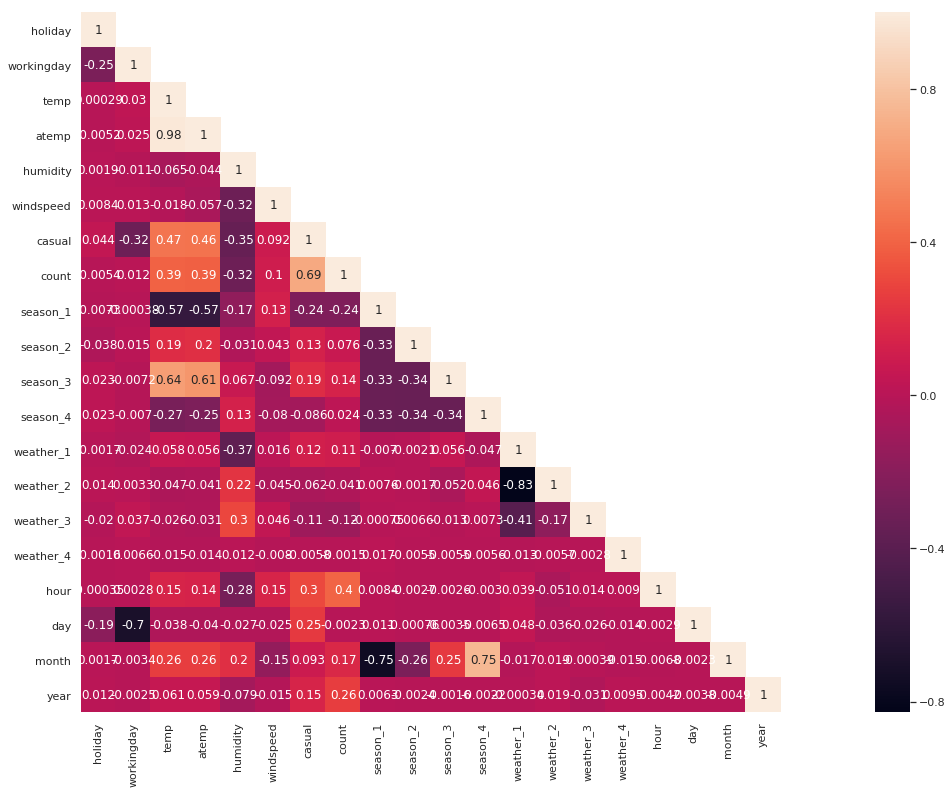

In [21]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

Analysis of count on new features ie day,hour,month

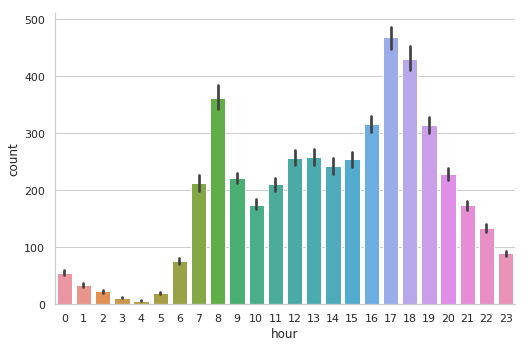

In [0]:
sns.factorplot(x="hour",y="count",data=df,kind='bar',size=5,aspect=1.5)
sns.factorplot(x="day",y="count",data=df,kind='bar',size=5,aspect=1.5)
sns.factorplot(x="month",y="count",data=df,kind='bar',size=5,aspect=1.5)
sns.factorplot(x="year",y="count",data=df,kind='bar',size=5,aspect=1.5)
plt.show()

In [0]:
#As per the visual analysis count depends on season hour and weather condition 

In [0]:
df.temp.max(),df.temp.min()

In [0]:
df.temp.value_counts()
new_df=df.copy()
new_df.temp.describe()
new_df['temp_bin']=np.floor(new_df['temp'])//5
new_df['temp_bin'].unique()
# now we can visualize as follows
sns.factorplot(x="temp_bin",y="count",data=new_df,kind='bar')

In [0]:
df.drop('day',axis=1,inplace=True)
test_df.drop('day',axis=1,inplace=True)
df.drop('month',axis=1,inplace=True)
test_df.drop('month',axis=1,inplace=True)

we have divided the temperature into bins minimum temperature is 0.82 and maximum is 41. its clearlt observed that counts increases up to 35 celsius after which demand reduces dute to very high temperature

In [0]:

x_train,x_test,y_train,y_test=train_test_split(df.drop('count',axis=1),df['count'],test_size=0.3,random_state=42)

In [0]:
models=[LinearRegression(),RandomForestRegressor(),AdaBoostRegressor(),SVR(),KNeighborsRegressor()]
model_names=['LinearRegression','RandomForestRegressor','AdaBoostRegressor','SVR','KNeighborsRegressor']
rmse=[]
Score=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    Score.append(clf.score(x_train,y_train))
    rmse.append(np.sqrt(mean_squared_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'Score':Score,'RMSE':rmse}   

    

In [0]:
from pandas import DataFrame
dd=pd.DataFrame(d,index=[1,2,3,4,5])
dd

In [0]:
df.columns

In [0]:

sns.factorplot(y='Modelling Algo',x='RMSE',data=dd,kind='bar',size=5,aspect=2)

In [0]:
from scipy.stats import zscore
df_scld=zscore(df)
df_scld=pd.DataFrame(df_scld,columns=['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'count', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'hour', 'year'])

In [0]:
df_scld.head(3)

In [0]:

x_train,x_test,y_train,y_test=train_test_split(df_scld.drop('count',axis=1),df_scld['count'],test_size=0.3,random_state=42)

In [0]:
models=[LinearRegression(),RandomForestRegressor(),AdaBoostRegressor(),SVR(),KNeighborsRegressor()]
model_names=['LinearRegression','RandomForestRegressor','AdaBoostRegressor','SVR','KNeighborsRegressor']
rmse=[]
Score=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    Score.append(clf.score(x_train,y_train))
    
    rmse.append(np.sqrt(mean_squared_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'Score':Score,'RMSE':rmse}   


In [0]:
from pandas import DataFrame
dd=pd.DataFrame(d,index=[1,2,3,4,5])
dd

In [0]:

sns.factorplot(y='Modelling Algo',x='RMSE',data=dd,kind='bar',size=5,aspect=2)

In [0]:
sns.factorplot(x='Modelling Algo',y='RMSE',data=dd,kind='point',size=5,aspect=3)

Tuning the model for better preformance 

selection of best hyperparameter for RF

In [0]:

param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,return_train_score=True)
grid_search.fit(x_train, y_train)


In [0]:
grid_search.best_params_

selection of best hyperparameter for KNN

In [0]:

n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict)
clf_knn.fit(x_train,y_train)
pred=clf_knn.predict(x_test)
print((np.sqrt(mean_squared_error(pred,y_test))))


In [0]:
clf_knn.best_params_

In [0]:
models=RandomForestRegressor()

rmse=[]
Score=[]
clf=models
clf.fit(x_train,y_train)
test_pred=clf.predict(x_test)
Score.append(clf.score(x_train,y_train))
rmse.append(np.sqrt(mean_squared_error(test_pred,y_test)))
print('score : s% rmse %s'%(Score,rmse)) 


In [0]:
column=x_train.columns

In [0]:
feature_importance=clf.feature_importances_

In [0]:
feature_imp=pd.DataFrame({'column':column,'feature_importance':feature_importance})
feature_imp['% ']=(feature_imp['feature_importance']*100)
feature_imp

RandomForest with hyperparameter

In [0]:
models=RandomForestRegressor(max_depth=8,max_features=10,min_samples_leaf=100,
 min_samples_split=200,
 n_estimators=20)

rmse=[]
Score=[]
clf=models
clf.fit(x_train,y_train)
test_pred=clf.predict(x_test)
Score.append(clf.score(x_test,y_test))
rmse.append(np.sqrt(mean_squared_error(test_pred,y_test)))
print('score : %s  rmse %s'%(Score,rmse)) 

knn with hyperparameter

In [0]:
models=KNeighborsRegressor(n_neighbors= 5)

rmse=[]
Score=[]
clf=models
clf.fit(x_train,y_train)
test_pred=clf.predict(x_test)
Score.append(clf.score(x_test,y_test))
rmse.append(np.sqrt(mean_squared_error(test_pred,y_test)))
print('score : %s rmse %s'%(Score,rmse)) 

 we are getting best predictions for RandomForestRegressor with very less rmse when compare to rest of the models